In [63]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [64]:
class AgentState(TypedDict):
    num1: int
    operation: str
    num2: int
    final_number: int

In [65]:
def adder(state: AgentState) -> AgentState:
    """This node adds two numbers"""

    state['final_number'] = state['num1'] + state['num2']
    return state

In [66]:
def subtractor(state: AgentState) -> AgentState:
    """This node subtracts two numbers"""

    state['final_number'] = state['num1'] - state['num2']
    return state

In [67]:
def multiplier(state: AgentState) -> AgentState:
    """This node multiplies two numbers"""

    state['final_number'] = state['num1'] * state['num2']
    return state

In [68]:
def divide(state: AgentState) -> AgentState:
    """This node divides two numbers"""

    state['final_number'] = state['num1'] / state['num2']
    return state

In [69]:
def decide_next_node(state: AgentState) -> AgentState:
    """This node decides which node to go to"""

    if state['operation'] == '+':
        return "addition_operation"

    elif state['operation'] == '-':
        return "subtraction_operation"

    elif state['operation'] == '*':
        return "multiplication_operation"

    elif state['operation'] == '/':
        return "division_operation"

In [70]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("multiplication_node", multiplier)
graph.add_node("division_node", divide)
# Pass-through function
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {"addition_operation": "add_node",
     "subtraction_operation": "subtract_node",
     "multiplication_operation": "multiplication_node",
     "division_operation": "division_node"}
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)
graph.add_edge("multiplication_node", END)
graph.add_edge("division_node", END)

app = graph.compile()

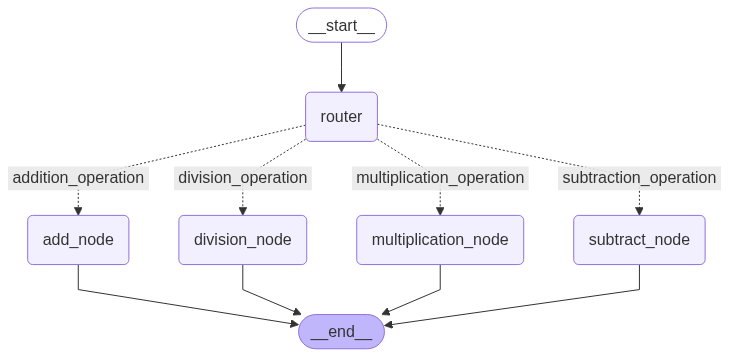

In [71]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [72]:
result = app.invoke({'num1': 78, 'operation': '/', 'num2': 219})

In [73]:
result['final_number']

0.3561643835616438